In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [231]:
test=pd.read_csv("black_friday/test.csv")
train=pd.read_csv("black_friday/train.csv")

In [232]:
test.shape

(233599, 11)

In [233]:
train.shape

(550068, 12)

In [234]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [235]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [236]:
train.describe(include="O")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [237]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [238]:
# Check duplicate entries

train.duplicated().sum()

# incase duplicate undenkil=========> train.drop_duplicates(inplace=True)

0

In [239]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [240]:
#  user id importance illa

train.drop("User_ID",axis=1,inplace=True)

In [241]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [242]:
# 1 check outlayers in training data   ee data setil outlayer illa
# 2 write function for impute missing values

In [243]:
#2>>>>>missing value function

In [244]:
def missing_values(data,fill_value,fill_types,columns,dataframe_name):  #dataframe_name and data are same,fill value for specific value imputation
    print("missing values befor removel in",dataframe_name,"data :")
    display(data.isnull().sum())

    for coloumn in columns:

        # Fill missing values with median values: --- > For Numeric features
        if "Median_Fill" in fill_types:
            data[coloumn].fillna(data[coloumn].median(),inplace=True)


        # Fill missing values with Mode values: --- > For Categorical features
        if "Mode_Fill" in fill_types:
             data[coloumn].fillna(data[coloumn].mode()[0],inplace=True)

        # Fill missing values with Specific values: --- > For Numeric/Categorical features
        if "Value_Fill" in fill_types:
            data[coloumn].fillna(fill_value,inplace=True)

        # new feature 
        if "New_Feature_Importance" in fill_types:
            data[column+'_NAN'] = np.where(data[column].isnull(),1,0)
            data[column].fillna(data[column].median(),inplace=True)


        if "Random_sample_Fill" in fill_types:
            data[column+"_random"]=data[column]
            ##It will have the random sample to fill the na
            random_sample = data[column].dropna().sample(data[column].isnull().sum(),random_state=0)
            ##pandas need to have same index in order to merge the dataset
            random_sample.index=data[data[column].isnull()].index
            data.loc[data[column].isnull(),column+'_random']=random_sample
            data[column]=data[column+"_random"]
            data.drop([column+"_random"],axis=1,inplace=True)


        # Fill Missing Values with Forward Fill  (Previous Row Value as Current Row in Table) : --- > For Numeric/Categorical features
        if "Forward_Fill" in fill_types :
            data[column].ffill(axis = 0, inplace=True)


         # Fill Missing Values with Backward Fill (Next Row Value as Current Row in Table) : --- > For Numeric/Categorical features
        if "Backward_Fill" in fill_types :
            data[ column ] = data[ column ].bfill(axis = 0)


    print("Missing Values AFTER REMOVAL in ",dataframe_name," data")
    display(data.isnull().sum())

    return data  
    

In [245]:
train.Product_Category_3.isnull().sum()

383247

In [246]:
train.Product_Category_3.unique()   # ithoru descrete data aan means ithrayum row undayittum aake 15 observation ollu so use mode imputation

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [247]:
train.Product_Category_2.unique()  # ithoru descrete data aan so use mode imputation

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [248]:
missing_values(data=train,fill_value=0,fill_types=["Mode_Fill"],columns=["Product_Category_2","Product_Category_3"],dataframe_name="train")

missing values befor removel in train data :


Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Missing Values AFTER REMOVAL in  train  data


Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,M,51-55,13,B,1,1,20,8.0,16.0,368
550064,P00375436,F,26-35,1,C,3,0,20,8.0,16.0,371
550065,P00375436,F,26-35,15,B,4+,1,20,8.0,16.0,137
550066,P00375436,F,55+,1,C,2,0,20,8.0,16.0,365


In [249]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 46.2+ MB


In [250]:
# fixing the categorical--Gender

train["Gender"]=train["Gender"].map({'F':0,'M':1})   #>>>>>>>> one hot encoding,,,,get dummies kodukkunnathin same aan first colom delete aaya shesham ulla output  but ith 2 vlaues mathrame ee method possible aavu

In [251]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 46.2+ MB


In [252]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,8.0,16.0,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,8.0,16.0,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,16.0,1057
4,P00285442,1,55+,16,C,4+,0,8,8.0,16.0,7969


In [253]:
# fixing the categorical--Age

In [254]:
train.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [255]:
train.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [256]:
#gender cheytha pole map vach namuk age rank cheyyam mukalile step same cheythal mathi ennal range value ullathine rank cheyyanulla function und

# manual way

train["Age"].map({'0-17':1,'55+':2,'51-55':3,'46-50':4,'18-25':5,'36-45':6,'26-35':7})

0         1
1         1
2         1
3         1
4         2
         ..
550063    3
550064    7
550065    7
550066    2
550067    4
Name: Age, Length: 550068, dtype: int64

In [257]:
# or using function

from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
train["Age"]=label_encoder.fit_transform(train["Age"])  #ith rank cheyyunnath from zero aayirikkum


In [258]:
# city catogory



In [259]:
train.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [260]:
#ivide relation onum illa

df=pd.get_dummies(train['City_Category'],drop_first=True)



In [261]:
pd.concat([train,df],axis=1)  # axis 1 koduthal colomaavum

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,6,16,C,4+,0,8,8.0,16.0,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,5,13,B,1,1,20,8.0,16.0,368,1,0
550064,P00375436,0,2,1,C,3,0,20,8.0,16.0,371,0,1
550065,P00375436,0,2,15,B,4+,1,20,8.0,16.0,137,1,0
550066,P00375436,0,6,1,C,2,0,20,8.0,16.0,365,0,1


In [262]:
train=pd.concat([train,df],axis=1)  

In [263]:
train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,6,16,C,4+,0,8,8.0,16.0,7969,0,1


In [264]:
train.drop("City_Category",axis=1,inplace=True)

In [265]:
train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969,0,1


In [266]:
# we are going to replace + in 4+

train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].str.replace("+","")

C:\Users\sharo\AppData\Local\Temp/ipykernel_20396/852684036.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].str.replace("+","")


In [267]:
train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969,0,1


In [268]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int32  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
dtypes: float64(2), int32(1), int64(5), object(2), uint8(2)
memory usage: 40.

In [269]:
# converting datatypes

train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].astype(int)

In [270]:
train['B']=train['B'].astype(int)

In [271]:
train['C']=train['C'].astype(int)

In [272]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int32  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  int32  
 11  C                           550068 non-null  int32  
dtypes: float64(2), int32(4), int64(5), object(1)
memory usage: 42.0+ MB


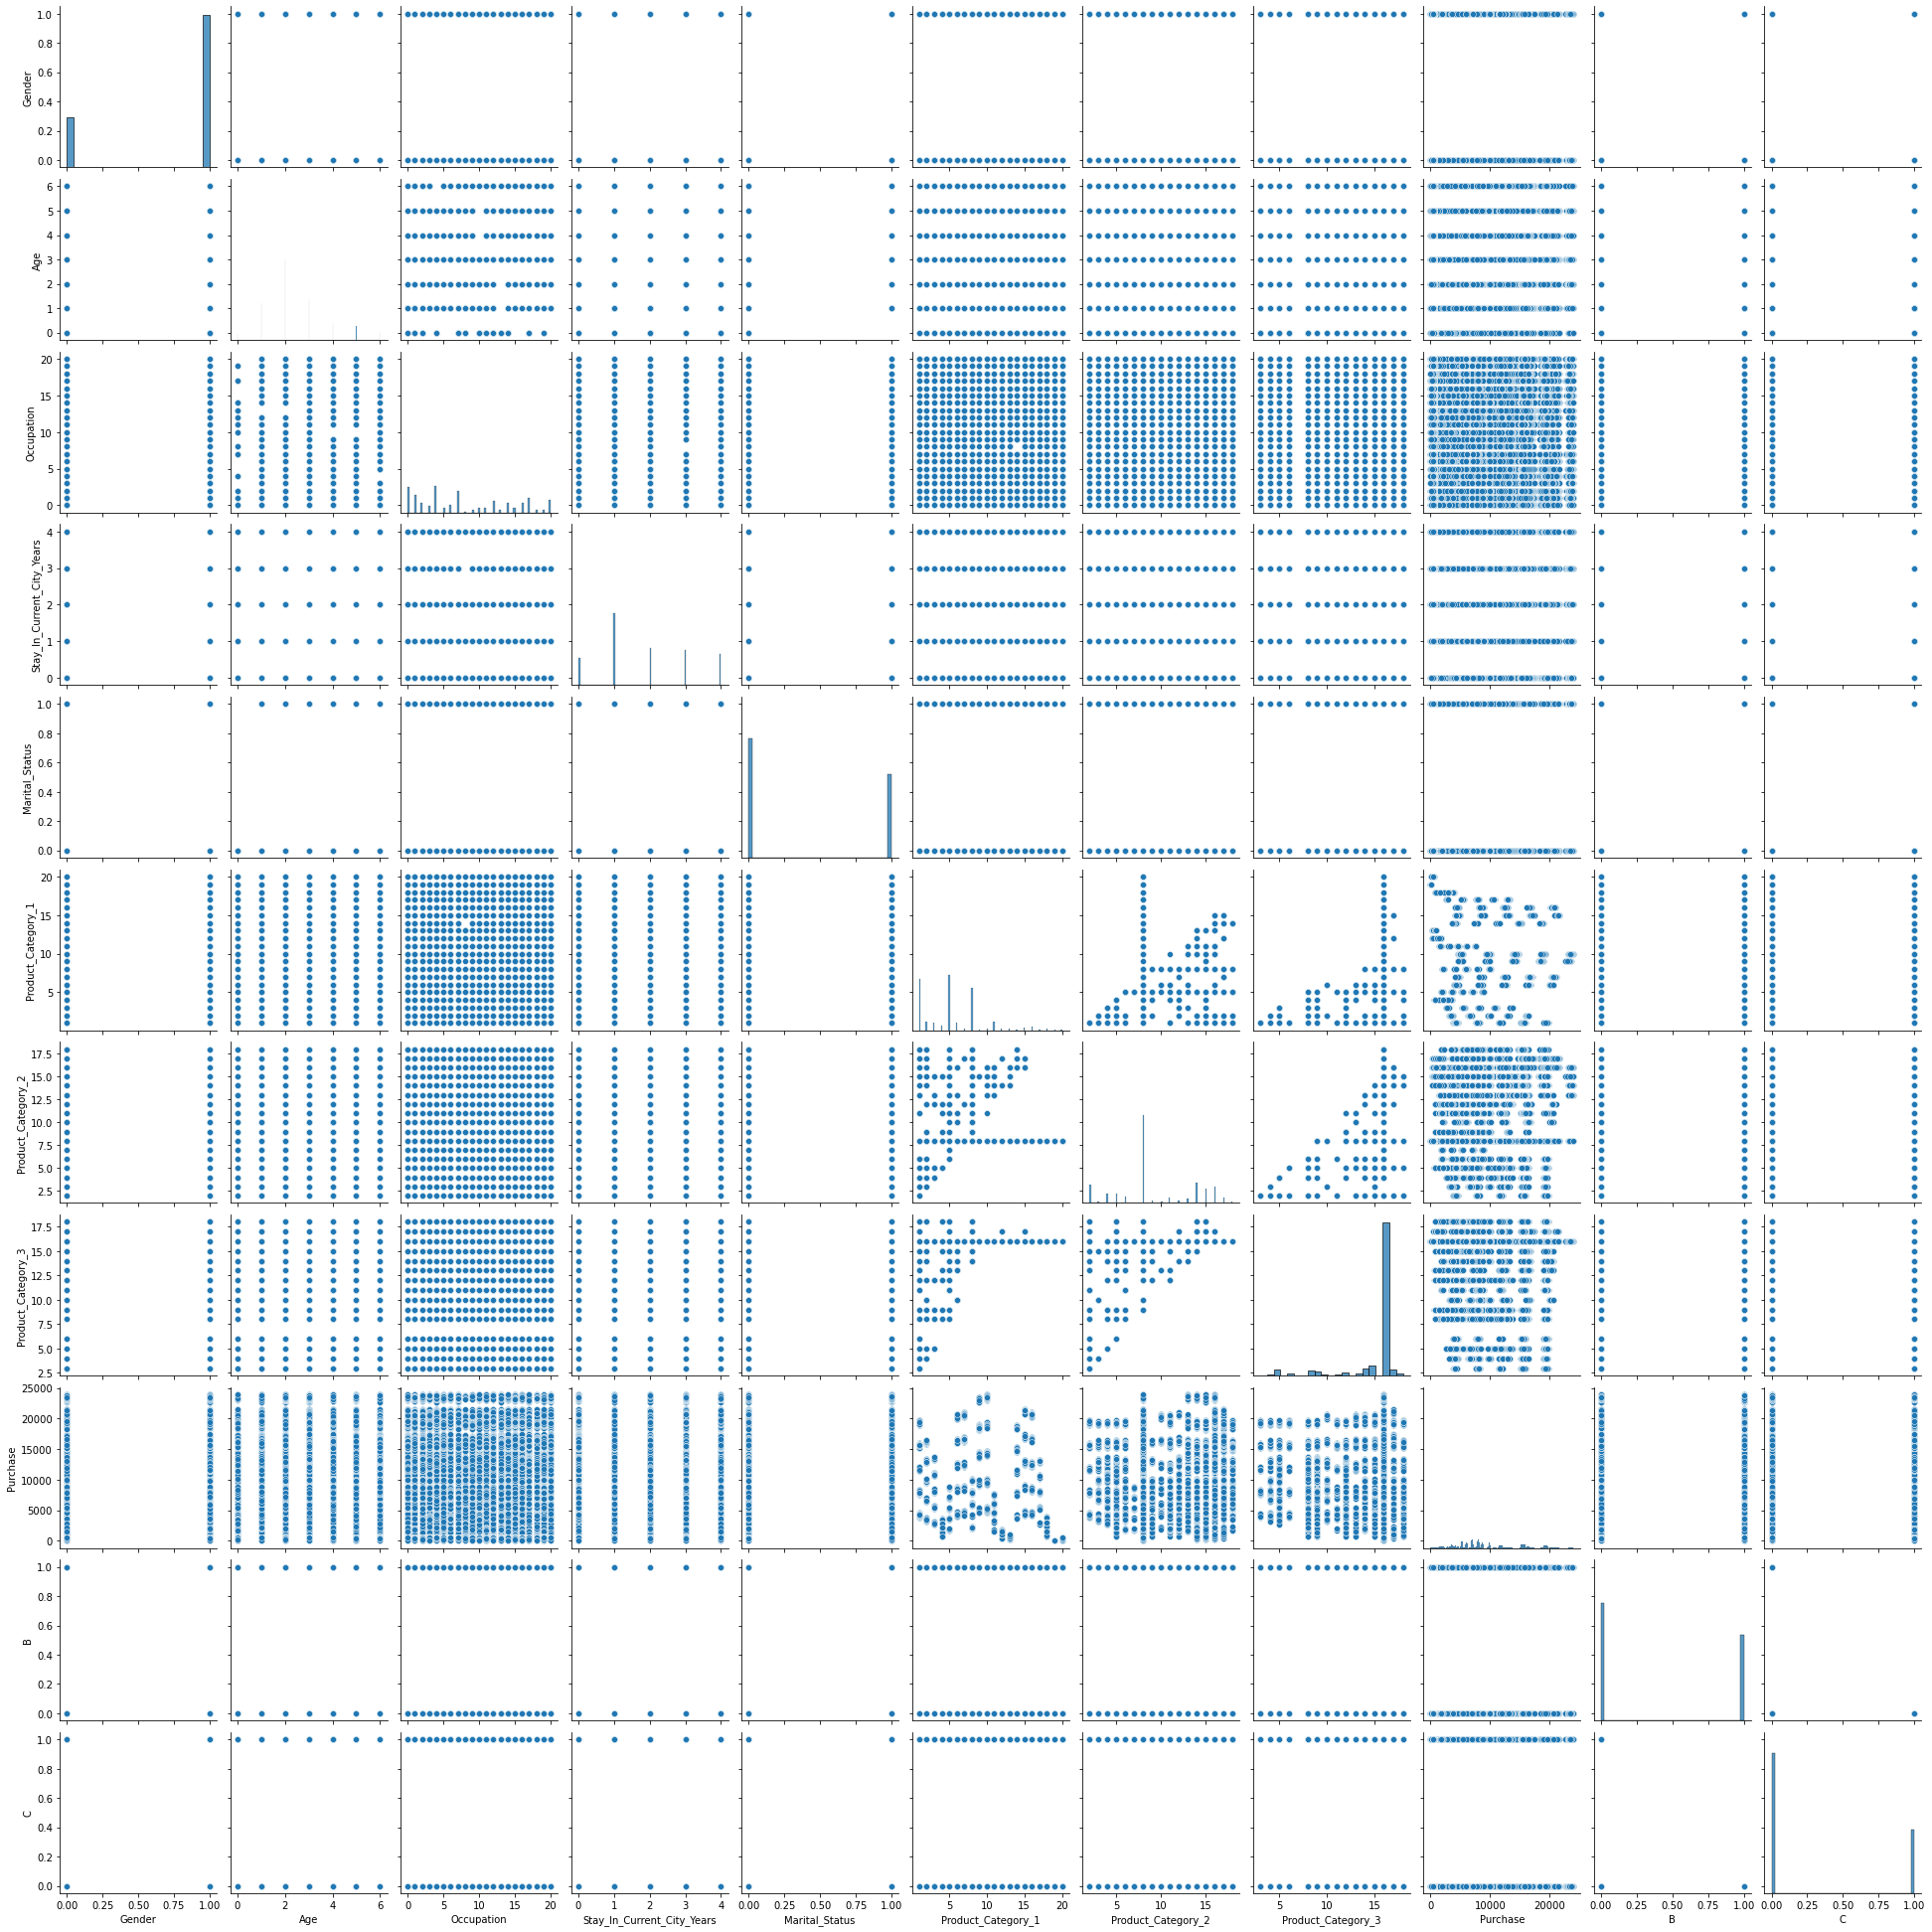

In [273]:
sns.pairplot(train)    # valiya data set aanenkil apt alla

c:\Users\sharo\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

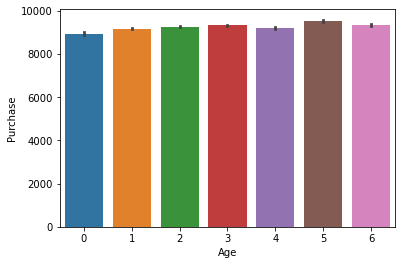

In [274]:
sns.barplot('Age','Purchase',data=train)  

In [275]:
train.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

c:\Users\sharo\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

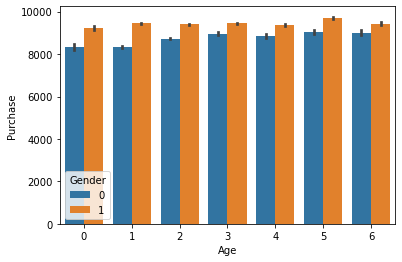

In [276]:
# occupation vs purchase withrespect to gender

sns.barplot('Age','Purchase',hue='Gender',data=train)  

c:\Users\sharo\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

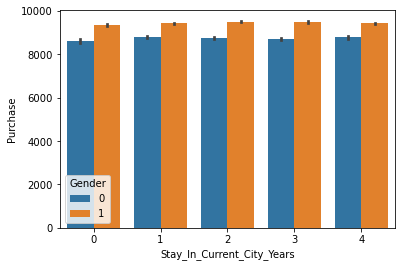

In [277]:
# stay in city vs purchase withrespect to gender
sns.barplot('Stay_In_Current_City_Years','Purchase',hue='Gender',data=train)  

c:\Users\sharo\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

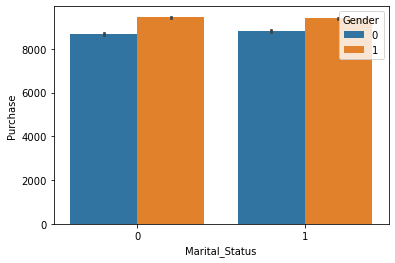

In [278]:
# 'Marital_Status' vs purchase withrespect to gender

sns.barplot('Marital_Status','Purchase',hue='Gender',data=train) 

In [279]:
# ingane ella colom cheythal relation namukk manasilakum

## scaling

In [281]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
newtrain=sc.fit_transform(train)


ValueError: could not convert string to float: 'P00069042'

In [ ]:
train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,672,0,0,10,2,0,3,8.0,16.0,8370,0,0
1,2376,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,852,0,0,10,2,0,12,8.0,16.0,1422,0,0
3,828,0,0,10,2,0,12,14.0,16.0,1057,0,0
4,2734,1,6,16,4,0,8,8.0,16.0,7969,0,1
